# Read Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A = pd.read_csv("C:/Documents/DataScience/training_set Loan.csv")
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Missing Data Treatment

In [3]:
A = A.replace(to_replace="3+", value=4)

In [4]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        x = A[i].mode()[0]
        A[i]= A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)

# Define X and Y

In [5]:
Y = A[["Loan_Status"]]
X = A.drop(["Loan_Status","Loan_ID"],axis=1)

# Exploratory Data Analysis

In [6]:
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5405.540850,1620.888940,146.412162,342.000000,0.842199
std,6108.923986,2926.235009,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

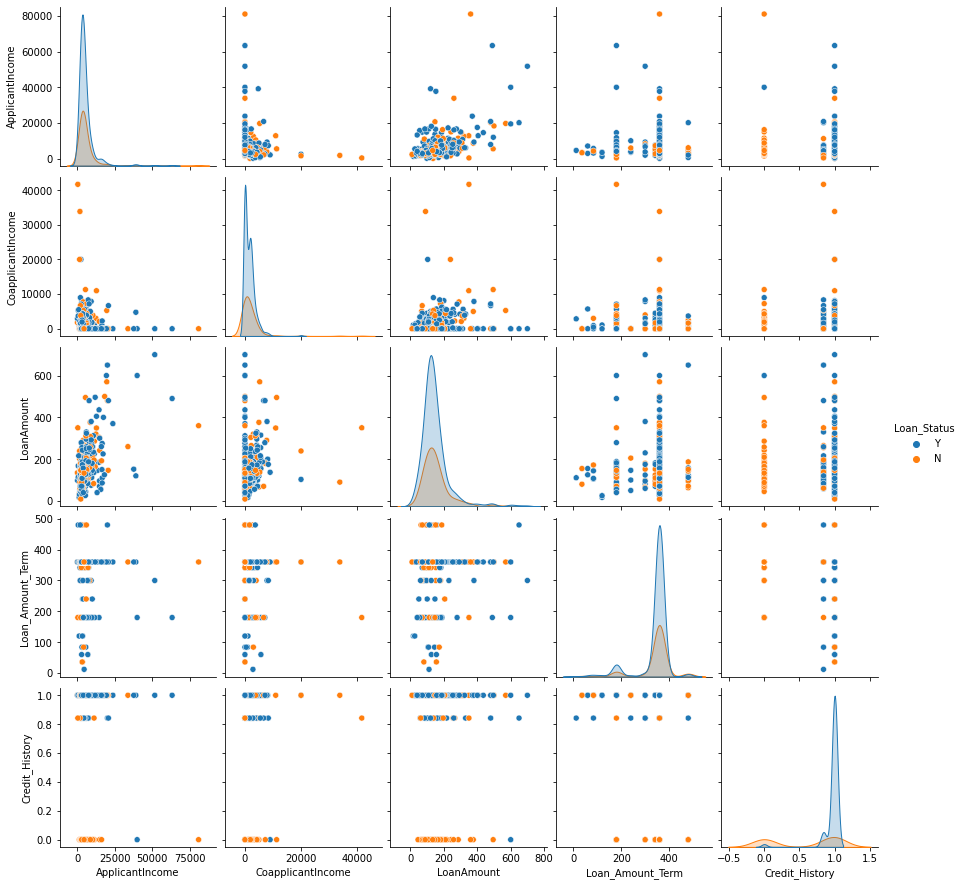

In [8]:
sb.pairplot(A, hue="Loan_Status")

In [9]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con+"~"+ cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)
imp_cols = []
for i in X.columns:
    if(X[i].dtypes!="object"):
        x = ANOVA(A,"Loan_Status",i)
        if(x < 0.05):
            print("Loan_Status vs ",i,"-->",x)
            imp_cols.append(i)

Loan_Status vs  Credit_History --> 0.0


<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

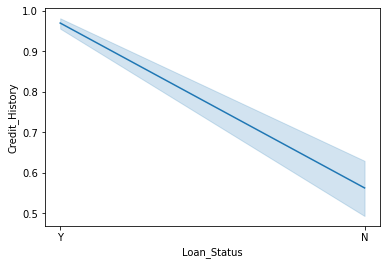

In [10]:
sb.lineplot(A.Loan_Status, A.Credit_History )

In [11]:
cat = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)

In [12]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    ct = pd.crosstab(df[cat1], df[cat2])
    a,b,c,d= chi2_contingency(ct)
    return b

imp_cat_cols=[]
for i in X[cat]:
    if(X[i].dtypes=="object"):
        x = chisquare(A, "Loan_Status",i)
        if(x<0.05):
            print("Type vs ", i, "--->", x)
            imp_cat_cols.append(i)

Type vs  Married ---> 0.029608580862582116
Type vs  Education ---> 0.04309962129357355
Type vs  Property_Area ---> 0.0021360187811644915


<AxesSubplot:xlabel='Education', ylabel='count'>

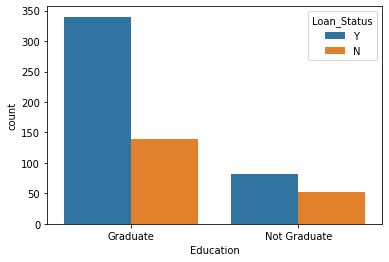

In [13]:
sb.countplot("Education",hue="Loan_Status", data=A)

<AxesSubplot:xlabel='Married', ylabel='count'>

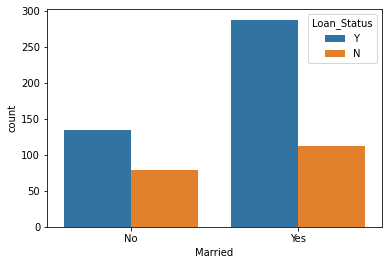

In [14]:
sb.countplot("Married",hue="Loan_Status", data=A)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

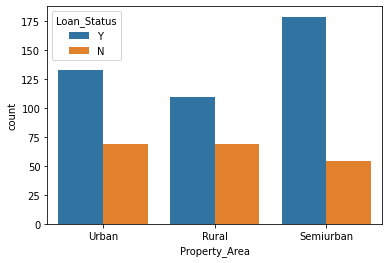

In [15]:
sb.countplot("Property_Area",hue="Loan_Status", data=A)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

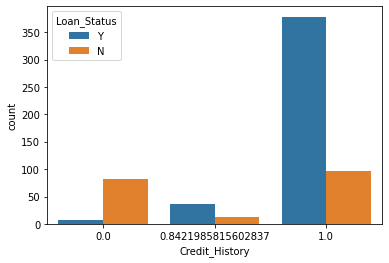

In [16]:
sb.countplot("Credit_History",hue="Loan_Status", data=A)

# Preprocessing

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[imp_cols]),columns=imp_cols)
X2 = pd.get_dummies(X[imp_cat_cols])
Xnew1 = X1.join(X2)
Xnew1

,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,1,0,0,0,1
1,1.0,0,1,1,0,1,0,0
2,1.0,0,1,1,0,0,0,1
3,1.0,0,1,0,1,0,0,1
4,1.0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
609,1.0,1,0,1,0,1,0,0
610,1.0,0,1,1,0,1,0,0
611,1.0,0,1,1,0,0,0,1
612,1.0,0,1,1,0,0,0,1


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = le.fit_transform(Y)
Ynew

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

# Divide the data in training and testing set

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew1,Ynew, test_size=0.2, random_state=21)

In [20]:
Xnew1.shape

(614, 8)

# Create a NN

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt

In [22]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(200,input_dim=(Xnew1.shape[1])))
    nn.add(Dropout(0.1))
    y= hp.Choice("units", values=[8,16,32,64,128,256,512,1024])
    nn.add(Dense(units=y))
    x = hp.Choice("rate", values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate=x))
    nn.add(Dense(20))
    nn.add(Dense(1, activation="sigmoid"))
    nn.compile(loss="binary_crossentropy", metrics="accuracy")
    return nn

In [23]:
tuner = kt.Hyperband(model_builder, objective="val_accuracy", max_epochs=10)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [24]:
tuner.search(xtrain,ytrain,epochs=30, validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


# Best val_accuracy: 0.8383838534355164

In [25]:
best = tuner.get_best_hyperparameters(num_trials=7)[0]

In [26]:
best.get("units")   # Hyperparameter for Hidden layer size

64

In [27]:
best.get("rate")     # Hyperparameter for DropOut

0.5

# Testing Data

In [28]:
B = pd.read_csv("C:/Documents/DataScience/testing_set.csv")
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [29]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Missing Data Treatment

In [30]:
B = B.replace(to_replace="3+", value=4)

In [31]:
for i in B.columns:
    if(B[i].dtypes=="object"):
        x = B[i].mode()[0]
        B[i]= B[i].fillna(x)
    else:
        x = B[i].mean()
        B[i] = B[i].fillna(x)

In [32]:
C = B.drop(labels="Loan_ID", axis=1)

In [33]:
cat = []
con = []
for i in C.columns:
    if(C[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)
        
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X1 = pd.DataFrame(mm.fit_transform(C[con]), columns=con)
X2 = pd.get_dummies(C[cat])

Xnew = X1.join(X2)
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_4,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.746835,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,0.042411,0.062500,0.187739,0.746835,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,0.068938,0.075000,0.344828,0.746835,1.000000,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,0.032263,0.106083,0.137931,0.746835,0.825444,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,0.045168,0.000000,0.095785,0.746835,1.000000,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,0.162835,0.746835,1.000000,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
363,0.057329,0.029542,0.166667,0.746835,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
364,0.044810,0.083042,0.187739,0.746835,0.825444,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
365,0.068938,0.099708,0.249042,0.746835,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [34]:
Xnew = Xnew[Xnew1.columns]

In [35]:
Xnew.shape

(367, 8)

# Create a NN

In [36]:
nn = Sequential()
nn.add(Dense(200,input_dim=(8)))
nn.add(Dropout(0.1))

nn.add(Dense(64))
nn.add(Dropout(0.5))

nn.add(Dense(20))
nn.add(Dropout(0.1))

nn.add(Dense(1,activation="sigmoid"))

In [37]:
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 5ms/step - loss: 0.6452 - accuracy: 0.6619
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7515
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7882
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7821
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7963
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4885 - accuracy: 0.8004
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.8004
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5044 - accuracy: 0.7821
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.8024
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7984
Epoch 11/50
5/5 [======================

# Prediction

In [38]:
Loan_Status=[]
for i in nn.predict(Xnew):
    if(i<0.5):
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)

In [39]:
result = B[["Loan_ID"]]
result["Loan_Status"] = le.inverse_transform(Loan_Status)

In [40]:
result

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

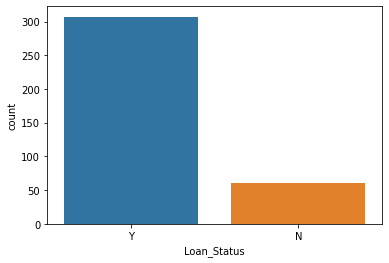

In [41]:
sb.countplot(x="Loan_Status",data=result)